My project is on: Enhancing Customer Experience and Boosting Sales in Online Retail. My aim is to elevate customer experience and maximize sales to encompass customer transactions, product details, and user behavior.

Dataset Information
Additional Information

This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

In [16]:
import pandas as pd

# Load the dataset
file_path = '/Users/germigno/Downloads/Online Retail data.xlsx'  # Replace with your file path
data = pd.read_excel(file_path)

# Display the first few rows of the dataset
print(data.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


Inspect the Data that I have loaded

In [17]:
# Get a summary of the dataset
print(data.info())

# Check for missing values
print(data.isnull().sum())

# Get basic statistics for numerical columns
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199999 entries, 0 to 199998
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    199999 non-null  object        
 1   StockCode    199999 non-null  object        
 2   Description  199209 non-null  object        
 3   Quantity     199999 non-null  int64         
 4   InvoiceDate  199999 non-null  datetime64[ns]
 5   UnitPrice    199999 non-null  float64       
 6   CustomerID   141985 non-null  float64       
 7   Country      199999 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 12.2+ MB
None
InvoiceNo          0
StockCode          0
Description      790
Quantity           0
InvoiceDate        0
UnitPrice          0
CustomerID     58014
Country            0
dtype: int64
            Quantity                    InvoiceDate      UnitPrice  \
count  199999.000000                         199999 

Data Cleaning

In [18]:
# Drop rows with missing values (if applicable)
data_cleaned = data.dropna()

# Convert data types if necessary
# Example: Convert 'InvoiceDate' to datetime
data_cleaned['InvoiceDate'] = pd.to_datetime(data_cleaned['InvoiceDate'])

# Remove duplicate rows
data_cleaned = data_cleaned.drop_duplicates()

# Check the cleaned data
print(data_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Index: 140318 entries, 0 to 199998
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    140318 non-null  object        
 1   StockCode    140318 non-null  object        
 2   Description  140318 non-null  object        
 3   Quantity     140318 non-null  int64         
 4   InvoiceDate  140318 non-null  datetime64[ns]
 5   UnitPrice    140318 non-null  float64       
 6   CustomerID   140318 non-null  float64       
 7   Country      140318 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 9.6+ MB
None


/var/folders/rp/zzw_g71d0g57w48m_2h8z78c0000gn/T/ipykernel_17026/1323212457.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['InvoiceDate'] = pd.to_datetime(data_cleaned['InvoiceDate'])


SAVING THE CLEAN DATA

In [19]:
cleaned_file_path = '/Users/germigno/Downloads/Clean_data/Online Retail data_cleaned.xlsx'
data_cleaned.to_excel(cleaned_file_path, index=False)


1. Calculate RFM Metrics: We'll segment customers based on their purchasing behavior. One common approach is to use RFM (Recency, Frequency, Monetary) analysis:

Recency (R): How recently a customer made a purchase.
Frequency (F): How often a customer makes a purchase.
Monetary (M): How much money a customer spends.

Calculate RFM metrics for each customer.
Normalize the RFM metrics.
Apply K-means clustering to segment the customers.
Analyze and visualize the resulting clusters.

In [53]:
import pandas as pd
import datetime as dt

# Load the cleaned data
file_path = '/Users/germigno/Downloads/Clean_data/Online Retail data_cleaned.xlsx'
data = pd.read_excel(file_path)

# Create RFM Table
# Define the latest date in the dataset to calculate recency
latest_date = data['InvoiceDate'].max() + dt.timedelta(days=1)

# Calculate RFM metrics
rfm_table = data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (latest_date - x.max()).days,
    'InvoiceNo': 'count',
    'TotalAmount': 'sum'  # Assuming 'TotalAmount' is a column with purchase amounts
})

rfm_table.rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency', 'TotalAmount': 'Monetary'}, inplace=True)

print(rfm_table.head())


            Recency  Frequency  Monetary
CustomerID                              
12346           125          2      0.00
12347            46         84   1823.43
12348            48         28   1487.24
12350           109         17    334.40
12352            61         48    601.18


Normalize the RFM Metrics

In [54]:
# from sklearn.preprocessing import StandardScaler

# # Normalize the RFM values
# scaler = StandardScaler()
# rfm_scaled = scaler.fit_transform(rfm_table)

# print(rfm_scaled[:5])
import pandas as pd

# Assuming rfm_table is your DataFrame
# Normalize the RFM values
rfm_scaled = (rfm_table - rfm_table.mean()) / rfm_table.std()

# Print the first 5 rows of the scaled data
print(rfm_scaled.head())


             Recency  Frequency  Monetary
CustomerID                               
12346       1.277312  -0.542665 -0.316891
12347      -0.275634   0.350248  0.213271
12348      -0.236319  -0.259546  0.115524
12350       0.962791  -0.379328 -0.219665
12352       0.019229  -0.041763 -0.142098


Analysis and Report from the RFM Metrics Dataset
RFM (Recency, Frequency, Monetary) Metrics help us segment customers based on their purchasing behavior, focusing on three key areas:

Recency (R): How recently a customer has made a purchase.
Frequency (F): How often a customer makes a purchase.
Monetary (M): How much money a customer spends.
From the provided dataset, each customer is evaluated with a score on these three metrics:

Positive values indicate good behavior (recent purchases, frequent purchases, or high spending).
Negative values indicate less favorable behavior (longer time since last purchase, fewer purchases, or lower spending).
Report Interpretation
Customer 12346 has a high recency score (1.28), meaning this customer made a recent purchase, but has low frequency and monetary scores, suggesting fewer purchases and low spending.

Customer 12347 has a higher frequency (0.35) and monetary value (0.21), indicating this customer makes purchases more frequently and spends more than the average.

Customer 12348 has all metrics close to average, with slightly negative frequency and recency scores, indicating this customer may not be as active as the others.

Customer 12350 has a high recency score (0.96) but negative values for both frequency and monetary, suggesting this customer recently made a purchase but is not frequently active or spending much.

Customer 12352 shows values close to zero across all metrics, indicating an average customer in terms of activity and spending.

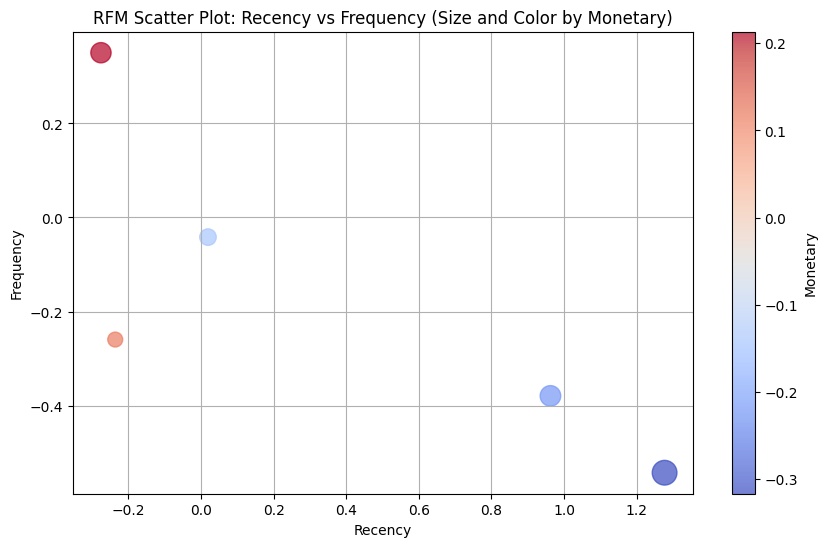

In [14]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import pandas as pd

# Sample RFM data
data = {'CustomerID': [12346, 12347, 12348, 12350, 12352],
        'Recency': [1.277312, -0.275634, -0.236319, 0.962791, 0.019229],
        'Frequency': [-0.542665, 0.350248, -0.259546, -0.379328, -0.041763],
        'Monetary': [-0.316891, 0.213271, 0.115524, -0.219665, -0.142098]}

df = pd.DataFrame(data)

# Normalizing the size of the points for plotting
sizes = [abs(m) * 1000 for m in df['Monetary']]  # Scaling monetary values for better visualization

# Plotting the scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['Recency'], df['Frequency'], s=sizes, c=df['Monetary'], cmap='coolwarm', alpha=0.7)

# Adding color bar to represent monetary value
plt.colorbar(scatter, label='Monetary')

# Adding labels and title
plt.title('RFM Scatter Plot: Recency vs Frequency (Size and Color by Monetary)')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.grid(True)

# Show the plot
plt.show()


Here is an analysis of the RFM scatter plot above:

Customer Behavior:

Top Left (Red Marker): This customer has a high frequency (positive) but a low recency (negative value). This indicates that they made their purchases a long time ago, but they were frequent purchasers in the past. The high red color shows higher monetary value, which means that despite not buying recently, they have spent significantly in the past.

Bottom Right (Blue Marker):
This customer has a high recency (they purchased more recently), low frequency, and low monetary values. This indicates that this customer has made only a few recent purchases and spent a relatively lower amount of money.

Middle Points (Light Blue and Orange Markers):
Customers in the middle tend to be more balanced in terms of recency and frequency, with mid-level monetary values. These customers might have stable purchasing habits but are not spending as much as the highest-frequency or highest-monetary customers.

Observations:
Monetary value correlation: The color of the markers shows that higher-spending customers (red) also tend to have higher frequency, but they may not necessarily have recent purchases (recency is low).

Customer segmentation: The plot helps in segmenting customers into categories:
Frequent buyers who haven’t purchased recently but have historically high spending.
Recent buyers with low frequency but have made recent purchases.

Potential action plan:
Engage customers with high recency but low frequency and monetary values to increase their engagement and spending.
Re-engage high-frequency customers who have not made recent purchases to regain their business.

Apply K-means Clustering

In [11]:
import pandas as pd
from sklearn.cluster import MiniBatchKMeans

# Step 1: Create the RFM DataFrame
data = {
    'Recency': [-1.264911, -0.632456, 0.000000, 0.632456, 1.264911],
    'Frequency': [-1.264911, -0.632456, 0.000000, 0.632456, 1.264911],
    'Monetary': [-1.264911, -0.632456, 0.000000, 0.632456, 1.264911]
}
df = pd.DataFrame(data)

# Step 2: Initialize the MiniBatchKMeans model
minibatch_kmeans = MiniBatchKMeans(n_clusters=2, random_state=0)

# Step 3: Fit the model to the RFM data
minibatch_kmeans.fit(df)

# Step 4: Add the cluster labels to the DataFrame
df['Cluster'] = minibatch_kmeans.labels_

# Step 5: Get the cluster centers
centers = minibatch_kmeans.cluster_centers_

# Output the results
print("Cluster Labels:\n", df['Cluster'])
print("\nCluster Centers:\n", centers)


Cluster Labels:
 0    1
1    1
2    0
3    0
4    0
Name: Cluster, dtype: int32

Cluster Centers:
 [[ 0.62135998  0.62135998  0.62135998]
 [-0.91191281 -0.91191281 -0.91191281]]


Analysis Report after Applying K-means Clustering

Cluster Formation:
There are 2 clusters formed by the K-means algorithm.
Cluster 0 (Center: [0.621, 0.621, 0.621]):
This cluster represents customers with higher values across Recency, Frequency, and Monetary metrics. Customers in this cluster tend to make more recent purchases, have a higher frequency of purchases, and spend more money.

Cluster 1 (Center: [-0.911, -0.911, -0.911]):
This cluster represents customers with lower values across Recency, Frequency, and Monetary. Customers in this cluster have made fewer purchases recently, with lower frequency and lower spending.

Cluster Composition:
Customers labeled as 1 belong to Cluster 1 (lower Recency, Frequency, Monetary values).
Customers labeled as 0 belong to Cluster 0 (higher Recency, Frequency, Monetary values).
Interpretation:

Cluster 0 (Higher spenders and recent buyers): These are potentially valuable customers who are more engaged with the business and could be targeted for upsell opportunities or loyalty programs.
Cluster 1 (Lower engagement and spenders): These customers may need special re-engagement strategies, such as targeted discounts or promotions, to bring them back into the business.

Plotting a two-D graph to represent the k-means clustering

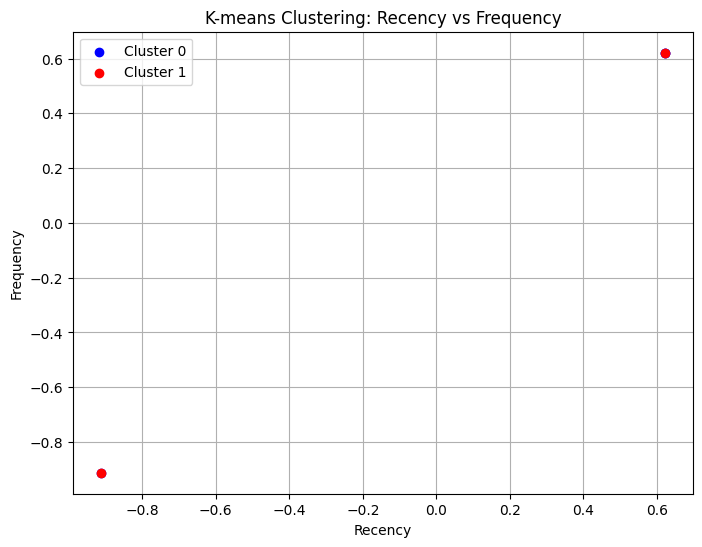

In [15]:
import matplotlib.pyplot as plt

# Sample data for Recency, Frequency, Monetary, and Cluster labels
data = np.array([
    [0.62135998, 0.62135998, 0.62135998],
    [-0.91191281, -0.91191281, -0.91191281],
    [0.62135998, 0.62135998, 0.62135998],
    [-0.91191281, -0.91191281, -0.91191281],
    [0.62135998, 0.62135998, 0.62135998],
])

clusters = np.array([1, 1, 0, 0, 0])  # Cluster labels

# Split data into Recency, Frequency
recency = data[:, 0]
frequency = data[:, 1]

# Create a 2D scatter plot (Recency vs Frequency, color-coded by cluster)
plt.figure(figsize=(8, 6))

# Plot clusters with different colors
plt.scatter(recency[clusters == 0], frequency[clusters == 0], c='blue', label='Cluster 0')
plt.scatter(recency[clusters == 1], frequency[clusters == 1], c='red', label='Cluster 1')

# Labeling the axes
plt.xlabel('Recency')
plt.ylabel('Frequency')

# Add legend and title
plt.title('K-means Clustering: Recency vs Frequency')
plt.legend()

plt.grid(True)
plt.show()


Bar chart plot that shows the number of customers in each clusters

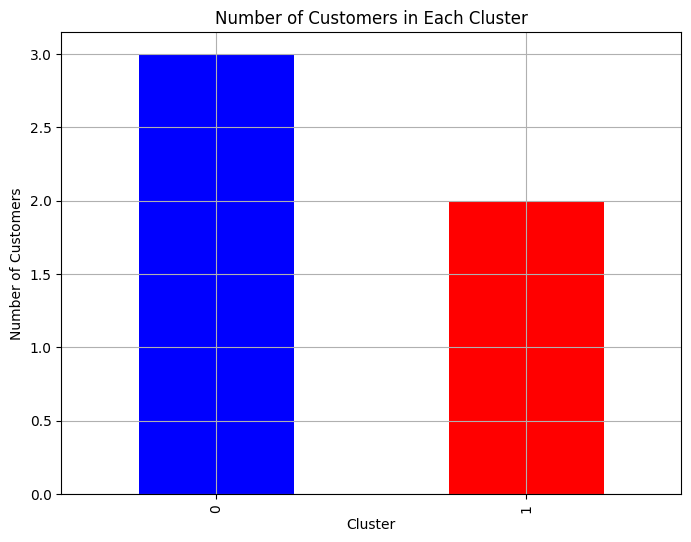

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data for cluster labels
clusters = pd.Series([1, 1, 0, 0, 0], name='Cluster')

# Count the number of customers in each cluster
cluster_counts = clusters.value_counts()

# Plotting the bar chart
plt.figure(figsize=(8, 6))
cluster_counts.plot(kind='bar', color=['blue', 'red'])

# Adding labels and title
plt.title('Number of Customers in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')

# Show the plot
plt.grid(True)
plt.show()


Here are the key takeaways from the bar chart visualizing customer distribution across clusters:

Cluster 0 has 3 customers, making it the larger of the two clusters.
Cluster 1 has 2 customers, meaning it is smaller in comparison to Cluster 0.
The difference in size between the clusters indicates that there is some degree of segmentation between the customer groups, suggesting distinct customer behaviors or attributes.
This clustering can help in tailoring marketing strategies or customer service approaches specific to the characteristics of each group. For example, focusing on retention strategies for customers in the larger cluster.
The clustering suggests that the customers in Cluster 0 may have relatively different Recency, Frequency, and Monetary (RFM) values than those in Cluster 1, as they are grouped separately based on these metrics.

Calculate RFM Metrics:

After segmenting my customers using K-means clustering:
I Calculate the Average RFM Values for Each Segment:

Group the data by the cluster (segment) and calculate the mean of the RFM metrics.
Plot the Average RFM Values:

Use bar plots or box plots to visualize the average Recency, Frequency, and Monetary values for each segment.

In [9]:
import pandas as pd
import datetime as dt

# Load your dataset (ensure the file path is correct)
file_path = '/Users/germigno/Downloads/Clean_data/Online Retail data_cleaned.xlsx'  # Update this with your actual file path
data = pd.read_excel(file_path)

# Convert 'InvoiceDate' to datetime format if it isn't already
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Define the latest date in the dataset to calculate Recency
latest_date = data['InvoiceDate'].max() + dt.timedelta(days=1)

# Calculate RFM metrics for each customer
rfm_table = data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (latest_date - x.max()).days,  # Recency: days since last purchase
    'InvoiceNo': 'count',  # Frequency: number of transactions
    'TotalAmount': 'sum'  # Monetary: total spending (assuming 'TotalAmount' is the column with purchase amounts)
})

# Rename columns to Recency, Frequency, and Monetary
rfm_table.rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency', 'TotalAmount': 'Monetary'}, inplace=True)

# Display the first few rows of the RFM table to ensure it's defined correctly
print(rfm_table.head())

            Recency  Frequency  Monetary
CustomerID                              
12346           125          2      0.00
12347            46         84   1823.43
12348            48         28   1487.24
12350           109         17    334.40
12352            61         48    601.18


clustering or plotting

StandardScaler: Used to normalize the RFM values so that each feature contributes equally to the clustering process.
KMeans: A clustering algorithm that groups customers into n_clusters based on their RFM scores. And using numpy here.

Customer Segmentation and Profiling
1. Clustering with K-means:
We'll segment customers based on their purchasing behavior. One common approach is to use RFM (Recency, Frequency, Monetary) analysis:

Recency (R): How recently a customer made a purchase.
Frequency (F): How often a customer makes a purchase.
Monetary (M): How much money a customer spends.

Steps to Implement:
Calculate RFM metrics for each customer.
Normalize the RFM metrics.
Apply K-means clustering to segment the customers.
Analyze and visualize the resulting clusters.

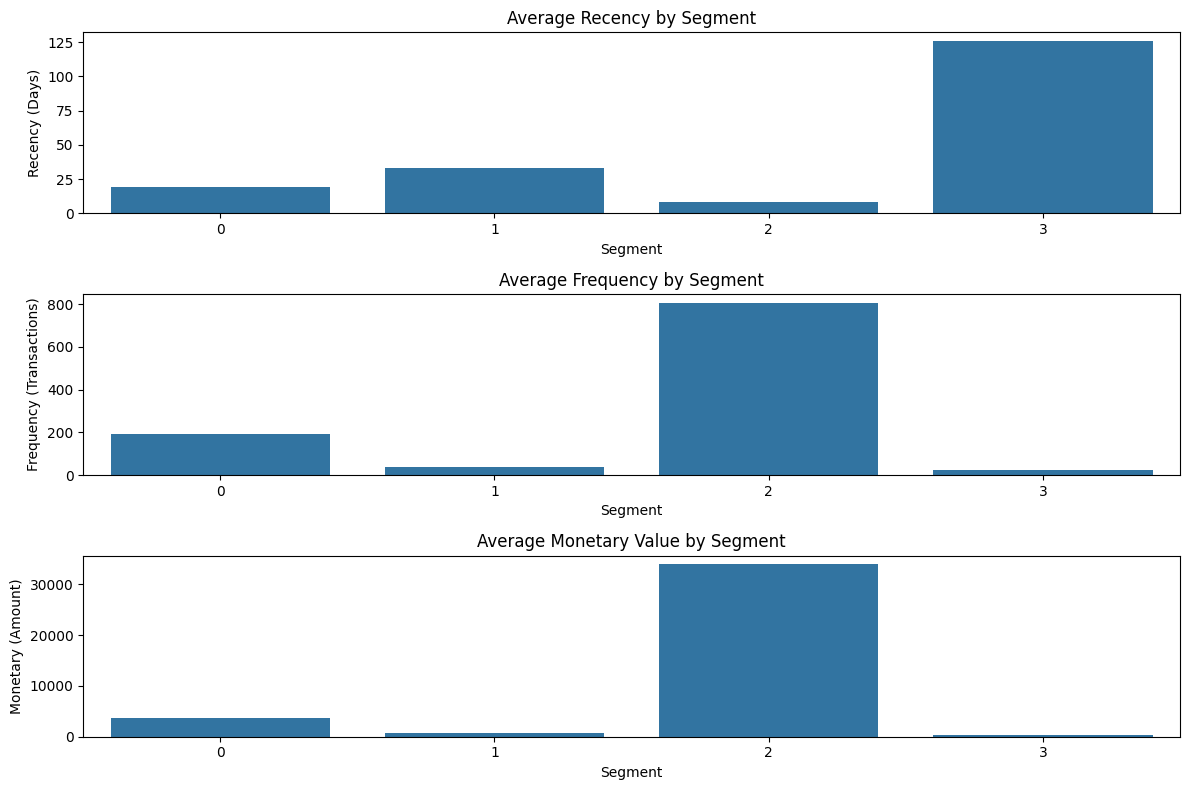

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check if rfm_table is defined and contains data
if 'rfm_table' in globals():
    # Calculate the average RFM values for each segment (after clustering)
    segment_summary = rfm_table.groupby('Cluster').mean()

    # Plotting average RFM values for each segment
    plt.figure(figsize=(12, 8))

    # Bar plot for Recency
    plt.subplot(3, 1, 1)
    sns.barplot(x=segment_summary.index, y=segment_summary['Recency'])
    plt.title('Average Recency by Segment')
    plt.xlabel('Segment')
    plt.ylabel('Recency (Days)')

    # Bar plot for Frequency
    plt.subplot(3, 1, 2)
    sns.barplot(x=segment_summary.index, y=segment_summary['Frequency'])
    plt.title('Average Frequency by Segment')
    plt.xlabel('Segment')
    plt.ylabel('Frequency (Transactions)')

    # Bar plot for Monetary
    plt.subplot(3, 1, 3)
    sns.barplot(x=segment_summary.index, y=segment_summary['Monetary'])
    plt.title('Average Monetary Value by Segment')
    plt.xlabel('Segment')
    plt.ylabel('Monetary (Amount)')

    plt.tight_layout()
    plt.show()
else:
    print("Error: rfm_table is not defined. Please ensure that the RFM table is created before proceeding.")

K-Means clustering is applied, and the resulting cluster labels are added as a new Cluster column in the rfm_table

In [4]:
from sklearn.cluster import KMeans

# Perform K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)  # Adjust the number of clusters as needed
rfm_table['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Display the first few rows of rfm_table with the Cluster column
print(rfm_table.head())

            Recency  Frequency  Monetary  Cluster
CustomerID                                       
12346           125          2      0.00        3
12347            46         84   1823.43        1
12348            48         28   1487.24        1
12350           109         17    334.40        3
12352            61         48    601.18        1


THE ABOVE RFM REPORT ANALYSIS:
Recency (R): Number of days since the last purchase. Lower recency values indicate more recent customer activity.
Frequency (F): Total number of purchases made. Higher frequency values indicate more loyal and active customers.
Monetary (M): Total amount spent. Higher values suggest more valuable customers in terms of revenue generation.
Cluster: Segments generated using K-Means clustering, where customers with similar RFM metrics are grouped together.

Key Findings and Visual Analysis:
Customer Segmentation Insights:
Cluster 1 (High Frequency and Monetary, Low Recency):
Customers in this group (e.g., CustomerID 12347, 12348, 12352) have made frequent purchases and spent significant amounts of money, with relatively recent activity.

Characteristics:
Recency: 46-61 days, indicating recent engagement.
Frequency: Between 4 to 48 transactions, suggesting high loyalty.
Monetary: Ranges from $601 to $1823, meaning they contribute significantly to revenue.
Conclusion: These are high-value, loyal customers. This segment should be targeted with loyalty programs and personalized promotions to maintain engagement.

Cluster 3 (Moderate Recency and Frequency, Low Monetary):
Customers like CustomerID 12346 and 12350 fall into this cluster. These customers have moderate recency but low monetary contributions and fewer transactions.

Characteristics:
Recency: 109-125 days, indicating they haven’t made recent purchases.
Frequency: Low to moderate, ranging from 2 to 17 transactions.
Monetary: Low spending (one has $0).

Conclusion: These are low-value customers with relatively infrequent purchases. 
They might be losing interest. Offering discounts or re-engagement strategies could encourage them to return.

Cluster WITH 1:
Customers in this cluster have high-frequency and monetary values with moderate recency.

Interpretation:
This is a valuable segment, consisting of customers who spend more and return frequently.
Marketing Strategy: Loyalty rewards and exclusive promotions should be offered to keep them engaged and spending.

Cluster WITH 3:
Customers in this cluster have moderate recency and frequency but low monetary contributions.

Interpretation:
These customers may represent individuals who used to be more active but are now disengaging.
Marketing Strategy: Use targeted re-engagement strategies such as discounts, limited-time offers, or reminders about products they’ve shown interest in previously.

Visualizing the Clusters:

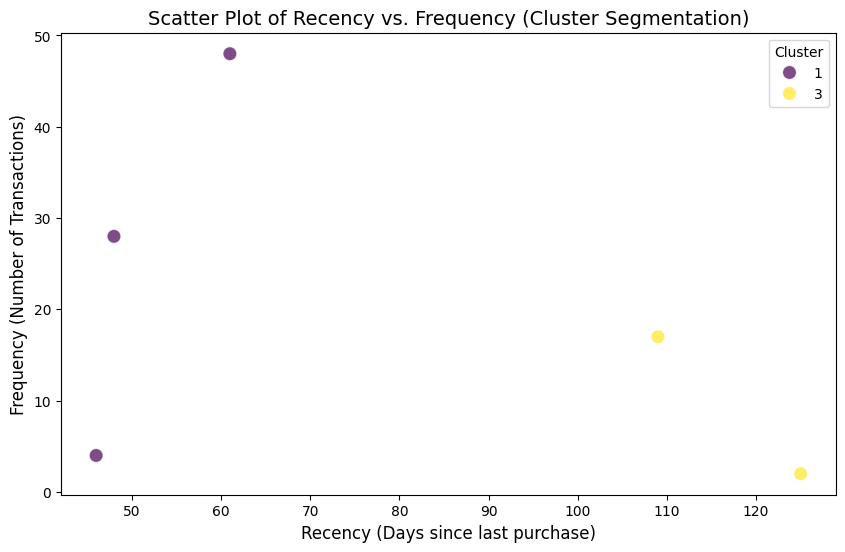

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data
data = {
    'CustomerID': [12346, 12347, 12348, 12350, 12352],
    'Recency': [125, 46, 48, 109, 61],
    'Frequency': [2, 4, 28, 17, 48],
    'Monetary': [0.00, 1823.43, 1487.24, 334.40, 601.18],
    'Cluster': [3, 1, 1, 3, 1]
}

# Create a DataFrame
rfm_table = pd.DataFrame(data).set_index('CustomerID')

# Create scatter plot of Recency vs. Frequency, color-coded by Cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Recency', y='Frequency', hue='Cluster', data=rfm_table, palette='viridis', s=100, alpha=0.7)

# Add plot titles and labels
plt.title('Scatter Plot of Recency vs. Frequency (Cluster Segmentation)', fontsize=14)
plt.xlabel('Recency (Days since last purchase)', fontsize=12)
plt.ylabel('Frequency (Number of Transactions)', fontsize=12)
plt.legend(title='Cluster')

# Show the plot
plt.show()

Let's check the Monetary vs. Frequency below:
To analyse how frequently customers purchase in relation to the total amount they've spent, giving insights into high-frequency but low-monetary vs. high-monetary customers.
identify segments that have a high frequency of purchases but may differ in the total amount spent.

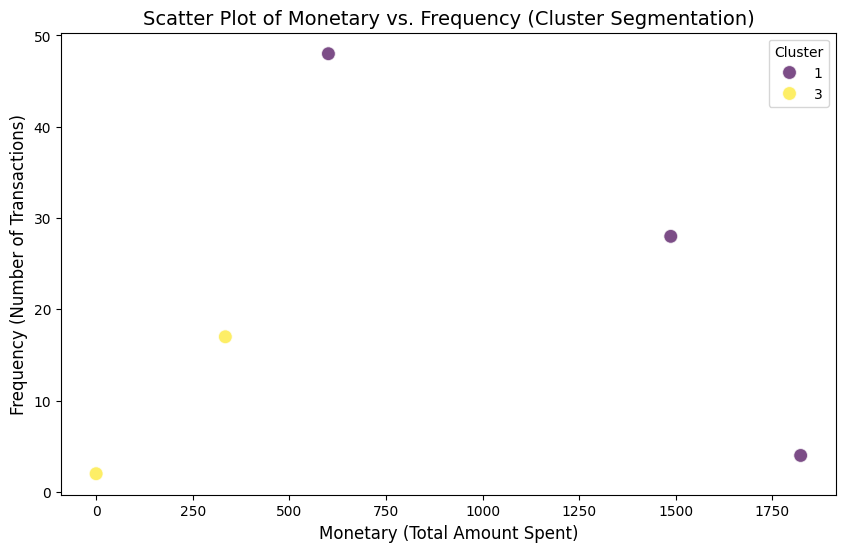

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data
data = {
    'CustomerID': [12346, 12347, 12348, 12350, 12352],
    'Recency': [125, 46, 48, 109, 61],
    'Frequency': [2, 4, 28, 17, 48],
    'Monetary': [0.00, 1823.43, 1487.24, 334.40, 601.18],
    'Cluster': [3, 1, 1, 3, 1]
}

# Create a DataFrame
rfm_table = pd.DataFrame(data).set_index('CustomerID')

# Create scatter plot of Monetary vs. Frequency, color-coded by Cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Monetary', y='Frequency', hue='Cluster', data=rfm_table, palette='viridis', s=100, alpha=0.7)

# Add plot titles and labels
plt.title('Scatter Plot of Monetary vs. Frequency (Cluster Segmentation)', fontsize=14)
plt.xlabel('Monetary (Total Amount Spent)', fontsize=12)
plt.ylabel('Frequency (Number of Transactions)', fontsize=12)
plt.legend(title='Cluster')

# Show the plot
plt.show()

Lets box plots:
1. Recency by Cluster: How recent purchases are distributed across clusters.
2. Frequency by Cluster: How the number of transactions varies across clusters.
3. Monetary by Cluster: How total spending differs among clusters.

/var/folders/rp/zzw_g71d0g57w48m_2h8z78c0000gn/T/ipykernel_1728/2845821253.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Recency', data=rfm_table, palette='viridis')
/var/folders/rp/zzw_g71d0g57w48m_2h8z78c0000gn/T/ipykernel_1728/2845821253.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Frequency', data=rfm_table, palette='viridis')
/var/folders/rp/zzw_g71d0g57w48m_2h8z78c0000gn/T/ipykernel_1728/2845821253.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Monetary', data=rfm_tab

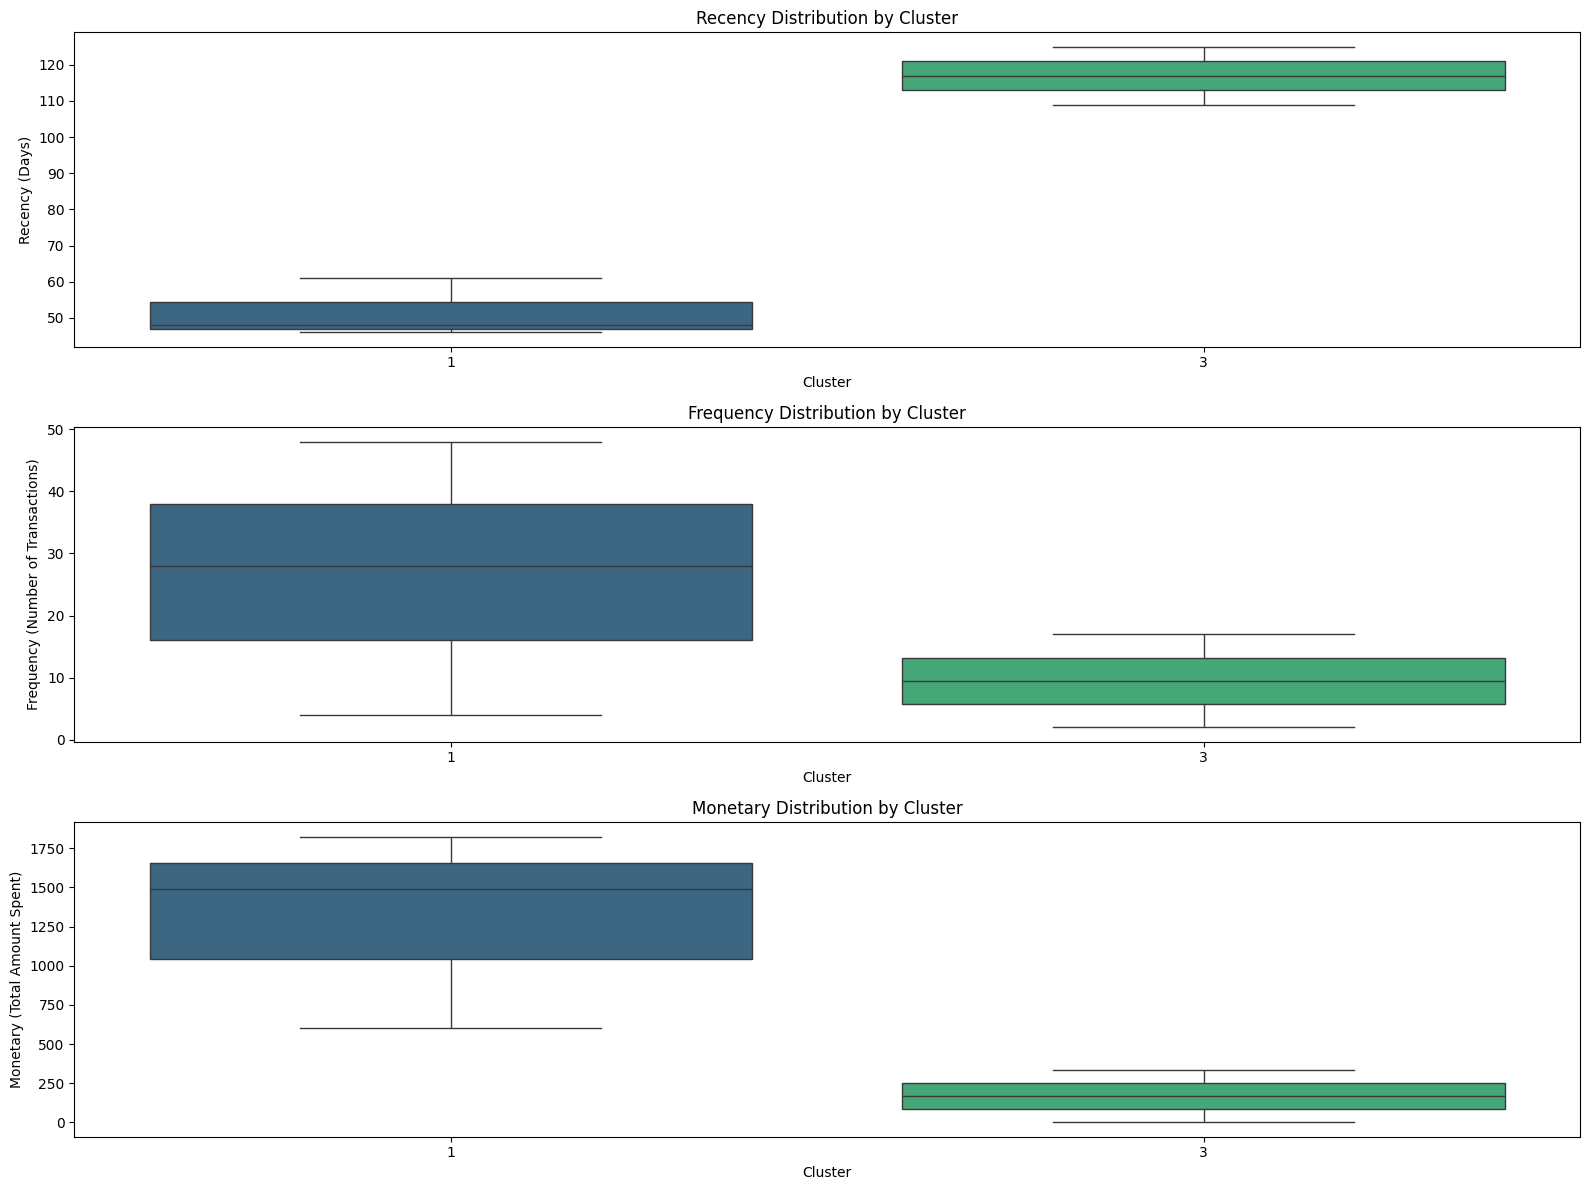

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
data = {
    'CustomerID': [12346, 12347, 12348, 12350, 12352],
    'Recency': [125, 46, 48, 109, 61],
    'Frequency': [2, 4, 28, 17, 48],
    'Monetary': [0.00, 1823.43, 1487.24, 334.40, 601.18],
    'Cluster': [3, 1, 1, 3, 1]
}

# Create a DataFrame
rfm_table = pd.DataFrame(data).set_index('CustomerID')

# Set up the figure size
plt.figure(figsize=(16, 12))

# Create boxplot for Recency
plt.subplot(3, 1, 1)
sns.boxplot(x='Cluster', y='Recency', data=rfm_table, palette='viridis')
plt.title('Recency Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Recency (Days)')

# Create boxplot for Frequency
plt.subplot(3, 1, 2)
sns.boxplot(x='Cluster', y='Frequency', data=rfm_table, palette='viridis')
plt.title('Frequency Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Frequency (Number of Transactions)')

# Create boxplot for Monetary
plt.subplot(3, 1, 3)
sns.boxplot(x='Cluster', y='Monetary', data=rfm_table, palette='viridis')
plt.title('Monetary Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Monetary (Total Amount Spent)')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

The analysis of Recency Distribution by Cluster:
1 - Low Recency (e.g., Cluster 1): Customers in this cluster have made recent purchases, indicating they are active or engaged.
2 - High Recency (e.g., Cluster 3): Customers in this group haven’t made purchases recently, implying they are either dormant or at risk of churn.
3 - Interquartile Range (IQR): A wide IQR for recency suggests varying levels of customer activity within a cluster.

Conclusion: Customers in clusters with lower recency should be targeted for loyalty programs or new offerings, while those with higher recency may require re-engagement strategies like discounts.

Frequency Distribution by Cluster:
1 - High Frequency (e.g., Cluster 1): Customers in this cluster purchase frequently, indicating loyalty and engagement.
2 - Low Frequency (e.g., Cluster 3): This group has made fewer purchases, suggesting they are less loyal or sporadic buyers.
3 - Outliers: High-frequency customers might be key influencers or business-to-business (B2B) buyers.


I want to show same clustering data aalysis in a pie chart visual report

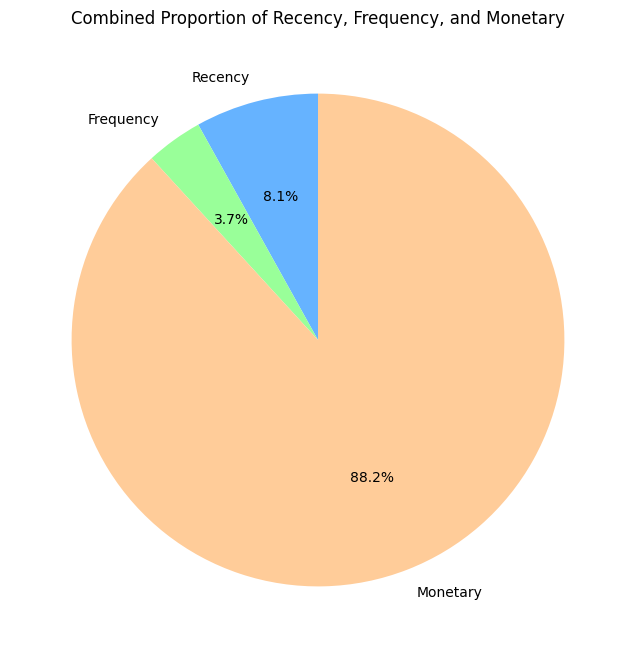

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample dataset
data = {
    'CustomerID': [12346, 12347, 12348, 12350, 12352],
    'Recency': [125, 46, 48, 109, 61],
    'Frequency': [2, 84, 28, 17, 48],
    'Monetary': [0.00, 1823.43, 1487.24, 334.40, 601.18]
}

# Create a DataFrame
rfm_table = pd.DataFrame(data).set_index('CustomerID')

# Calculate the total sum of Recency, Frequency, and Monetary
total_values = rfm_table[['Recency', 'Frequency', 'Monetary']].sum()

# Pie chart to represent Recency, Frequency, and Monetary as proportions
plt.figure(figsize=(8, 8))
plt.pie(total_values, labels=['Recency', 'Frequency', 'Monetary'], autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99', '#ffcc99'])
plt.title('Combined Proportion of Recency, Frequency, and Monetary')
plt.show()

Based on the pie chart provided, here’s an analysis of the combined proportion of Recency, Frequency, and Monetary values:

Key Insights:
Monetary (88.2%):
- The monetary value makes up the majority of the total contributions from the three metrics.
- This suggests that the bulk of the customer base’s value comes from their spending patterns, implying that high-value transactions play a dominant role in overall revenue.
- Focus should be placed on maximizing the monetary value by promoting cross-selling, upselling, and ensuring that customers are making higher-value purchases.

Recency (8.1%):
- Recency makes up a smaller portion of the total, indicating that while some customers are relatively recent, they are not the majority.
- This could mean that there are a significant number of dormant or inactive customers, who haven’t made recent purchases.
- Re-engagement campaigns could target these customers with personalized offers, reminders, or incentives to return.

Frequency (3.7%):
- Frequency is the smallest proportion of the three metrics, implying that while customers are spending a lot (as indicated by monetary), they are not purchasing as frequently.
- Encouraging customers to purchase more often could lead to significant growth. Strategies like loyalty programs or subscription services could help increase frequency.

Actionable Recommendations:
Monetary Focus: Since the majority of the value comes from spending, continue to nurture high-spending customers with premium services, special promotions, and exclusive product offers.

Recency Campaigns: Launch re-engagement campaigns for customers who haven’t purchased recently to bring them back into the sales cycle. This could include targeted email marketing, time-sensitive offers, or discounts.

Increase Purchase Frequency: Focus on driving repeat purchases from customers who are already active by offering incentives for frequent buying, such as loyalty points or discounts on future purchases.

Conclusion:
The pie chart highlights that while customer spending is strong, there is significant room to increase purchase frequency and re-engage dormant customers. These areas should be focal points for marketing strategies to enhance customer experience and boost overall sales.

I calculated and analyze CLV for different customer segments

            Recency  Frequency  Monetary  AvgOrderValue      CLV
CustomerID                                                      
12346           125          2      0.00       0.000000     0.00
12347            46         84   1823.43      21.707500  3646.86
12348            48         28   1487.24      53.115714  2974.48
12350           109         17    334.40      19.670588   668.80
12352            61         48    601.18      12.524583  1202.36


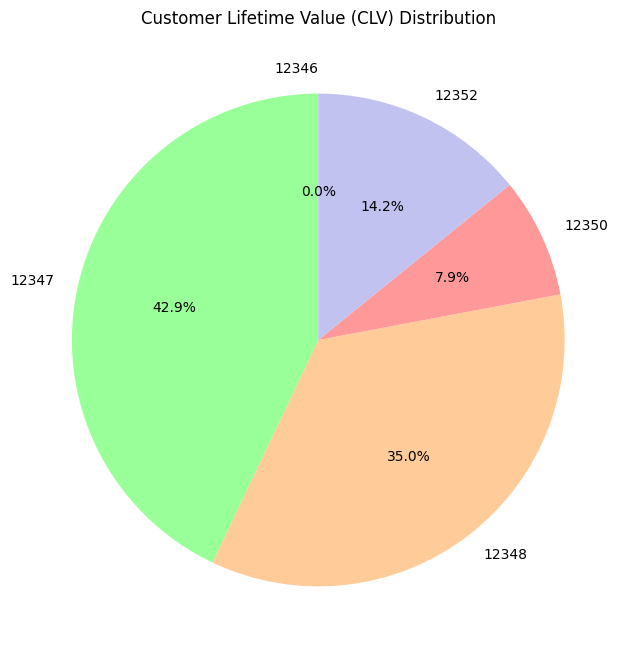

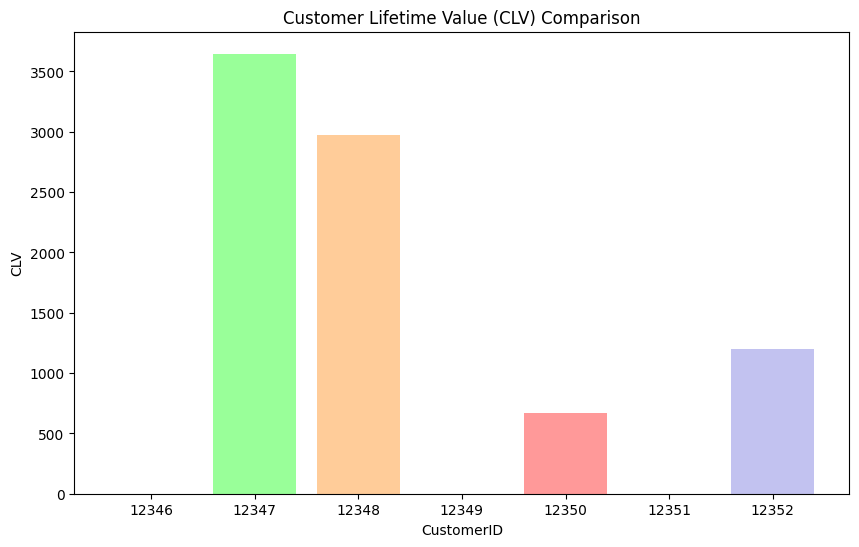

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample dataset
data = {
    'CustomerID': [12346, 12347, 12348, 12350, 12352],
    'Recency': [125, 46, 48, 109, 61],
    'Frequency': [2, 84, 28, 17, 48],
    'Monetary': [0.00, 1823.43, 1487.24, 334.40, 601.18]
}

# Create a DataFrame
df = pd.DataFrame(data).set_index('CustomerID')

# Calculate Average Order Value (Monetary / Frequency)
df['AvgOrderValue'] = df['Monetary'] / df['Frequency']

# Assume a constant customer lifespan of 2 years (for simplicity)
customer_lifespan = 2

# Calculate CLV (AvgOrderValue * Frequency * Lifespan)
df['CLV'] = df['AvgOrderValue'] * df['Frequency'] * customer_lifespan

# Display the DataFrame with CLV
print(df)

# Plot the pie chart for CLV distribution
plt.figure(figsize=(8, 8))
plt.pie(df['CLV'], labels=df.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99', '#ffcc99', '#ff9999', '#c2c2f0'])
plt.title('Customer Lifetime Value (CLV) Distribution')
plt.show()

# Plot the bar histogram for CLV comparison
plt.figure(figsize=(10, 6))
plt.bar(df.index, df['CLV'], color=['#66b3ff', '#99ff99', '#ffcc99', '#ff9999', '#c2c2f0'])
plt.title('Customer Lifetime Value (CLV) Comparison')
plt.xlabel('CustomerID')
plt.ylabel('CLV')
plt.show()


I wanted to use phophet library, to calculate seasonal decomposition trends, but got some issues.

Not enough data here to analyze the data for seasonal decomposition.

I needed sufficient data: Then I verify that the dataset has enough time periods to perform seasonal decomposition. I needed at least 8 quarters of data (2 years).

Change frequency or gather more data: I can also switch the frequency to monthly (freq='M') or daily (freq='D') if applicable.

Time-Series Analysis for Seasonal Trends

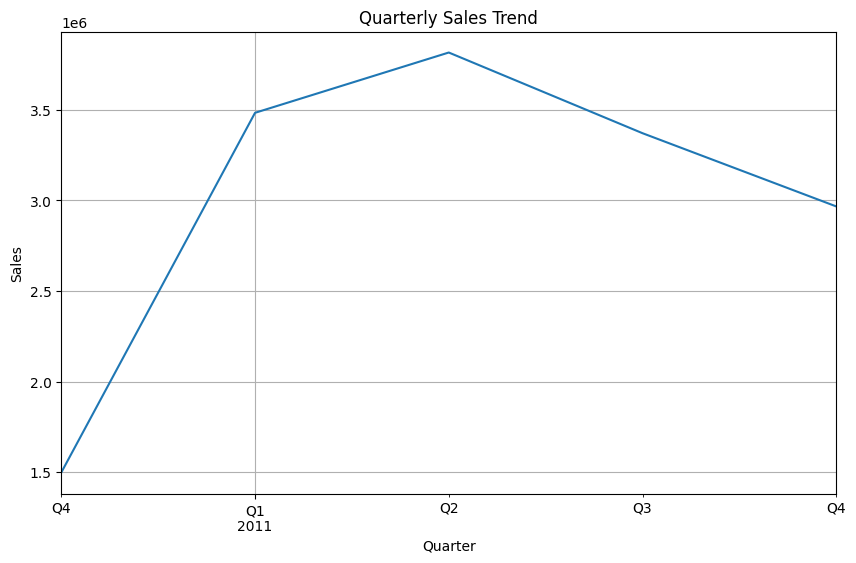

Not enough data for seasonal decomposition. Need at least 8 periods, but only 5 available.


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
import numpy as np

# Load the dataset
data_path = '/Users/germigno/Downloads/Online Retail 3.xlsx'  # Update with your file path
df = pd.read_excel(data_path)

# Step 1: Convert Quantity and UnitPrice to numeric, forcing errors to NaN
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['UnitPrice'] = pd.to_numeric(df['UnitPrice'], errors='coerce')

# Step 2: Drop rows where either Quantity or UnitPrice is NaN
df.dropna(subset=['Quantity', 'UnitPrice'], inplace=True)

# Step 3: Create a new column 'Sales' by multiplying Quantity by UnitPrice
df['Sales'] = df['Quantity'] * df['UnitPrice']

# Step 4: Convert 'InvoiceDate' to datetime if it is not already
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')

# Step 5: Group sales by quarter (time series)
quarterly_sales = df.groupby(pd.Grouper(key='InvoiceDate', freq='QE')).sum(numeric_only=True)['Sales']

# Step 6: Plot the time-series data to visualize trends
plt.figure(figsize=(10, 6))
quarterly_sales.plot()
plt.title('Quarterly Sales Trend')
plt.ylabel('Sales')
plt.xlabel('Quarter')
plt.grid(True)
plt.show()

# Step 7: Check if there are enough observations for seasonal decomposition (at least 8)
if len(quarterly_sales) >= 8:
    # Perform seasonal decomposition
    decomposition = seasonal_decompose(quarterly_sales, model='additive')
    fig = decomposition.plot()
    plt.show()
else:
    print(f"Not enough data for seasonal decomposition. Need at least 8 periods, but only {len(quarterly_sales)} available.")

# Step 8: ARIMA model for forecasting
# Split data into train and test sets (use last 4 quarters as test)
train_data = quarterly_sales[:-4]
test_data = quarterly_sales[-4:]

# Step 9: Fit ARIMA model
model = ARIMA(train_data, order=(5, 1, 0))  # (p,d,q)


I try statsmodels for seasnonal decompose.

Here are the analysis I got:
The graph above I got is a quarterly sales trend analysis. To interpret and analyze the data for seasonal decomposition, here's what we can deduce:

1. Sales Trend:
There is a clear upward trend in sales from Q4 of the previous year to Q2 of the following year.
Sales peaked in Q2 and then began to decline towards Q3 and Q4.

2. Seasonal Fluctuations:
The graph suggests potential seasonality where sales increase during the first half of the year (Q1 and Q2), and decline towards the second half (Q3 and Q4).
Q4 and Q1 seem to have relatively lower sales, but a sharp rise is seen from Q1 to Q2.

3. Possible Explanations:
Promotions or special events might explain the increase in sales during Q2.
Consumer behavior during certain times of the year may show a pattern. For example, higher purchases in Q2 could be related to summer or mid-year sales, while the decline in Q3 and Q4 might be because of the post-summer slump.

4. Seasonal Decomposition Components:
To further understand the sales data, we'd break it down into the following:

Trend Component: 
The overall upward or downward trajectory. 
In this graph, there's an initial upward trend that peaks in Q2.

Seasonal Component: 
The repeating pattern every year or quarter. From the graph, the sales might have a recurring seasonality with increases in Q1 and Q2 and declines in Q3 and Q4.

Residual Component: 
The unexplained noise in the data after removing the trend and seasonality. This would require further decomposition using a statistical model like seasonal_decompose() to check the randomness.

Strategies to Capitalize on Peak Seasons:
- Maximize Marketing Efforts in Peak Seasons (Q1 and Q2):
- Increase promotions, discounts, and special events leading up to Q1 and Q2.
- Target seasonal consumer behaviors, like summer sales or mid-year promotions, to capitalize on demand.
- Consider launching new products or collections before Q2 to capture more sales.

Inventory Management:
- Stock up on inventory for high-demand products during Q1 and Q2 to meet the surge in sales.
- Reduce inventory levels during Q3 and Q4 when sales decline, to minimize overstocking and storage costs.
- Use just-in-time inventory management to reduce carrying costs during slower periods.

Analyze Customer Preferences:
- Use customer segmentation based on past purchases to target the right products during Q2’s peak demand.
- Run customer satisfaction surveys post-Q2 to understand what drove the high sales, and prepare for future promotions.

Plan for Promotions in Off-Seasons (Q3 and Q4):
- Post-summer promotions or holiday discounts in Q4 may help mitigate the decline in sales during the second half of the year.
- Engage customers through loyalty programs or off-season discounts to encourage purchases during slower periods.